In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Churn_model.csv')

In [3]:
df.drop(['Unnamed: 0'],axis = 1,inplace = True)
df.head()

,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure,MonthlyCharges,TotalCharges
0,0,0,0,0,1,2,0,0,0,0,0,0.0,1,1,1,0.758426,-0.278080,0.286083
1,0,1,0,2,1,0,0,0,0,0,2,0.0,1,2,1,1.613592,-0.873018,0.213067
2,0,1,0,1,0,0,2,0,0,0,2,0.0,1,0,1,-0.911184,0.692433,-0.646863
3,1,1,0,0,1,2,0,0,0,0,0,0.0,1,0,1,-0.829739,-1.486236,-0.888808
4,0,0,0,1,0,0,0,0,0,0,0,0.0,1,3,1,0.391927,0.057611,0.212957


In [4]:
X = df.drop(['Churn'],axis = 1)
y = df.loc[:,'Churn']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 8)

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [8]:
params = {'n_estimators':range(1,250)}

In [9]:
from sklearn.model_selection import RandomizedSearchCV

In [10]:
search = RandomizedSearchCV(gb,params,cv = 10)

In [11]:
search.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'n_estimators': range(1, 250)})

In [12]:
search.best_estimator_

GradientBoostingClassifier(n_estimators=234)

In [13]:
gb2 = search.best_estimator_

In [14]:
model_gb = gb2.fit(X_train,y_train)

In [15]:
y_pred = model_gb.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,roc_auc_score

In [25]:
accuracy_score(y_test,y_pred)

0.7694538424359594

In [26]:
print(confusion_matrix(y_test,y_pred))

[[742 268]
 [209 850]]


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.73      0.76      1010
           1       0.76      0.80      0.78      1059

    accuracy                           0.77      2069
   macro avg       0.77      0.77      0.77      2069
weighted avg       0.77      0.77      0.77      2069



In [28]:
y_pred_prob = model_gb.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])
Area = auc(fpr,tpr)
Area

0.8446054095494535

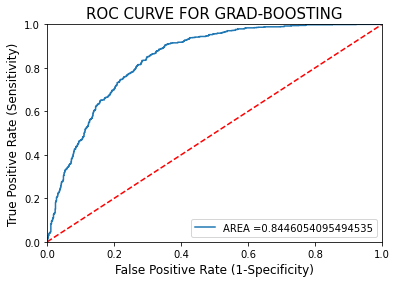

In [43]:
plt.plot([0,1],[0,1],'--r');
plt.plot(fpr,tpr,label = 'AREA =' +str(Area),);
plt.legend(loc = 4)
plt.ylim([0,1]);
plt.xlim([0,1]);
plt.title('ROC CURVE FOR GRAD-BOOSTING',size = 15);
plt.ylabel('True Positive Rate (Sensitivity)',size = 12);
plt.xlabel('False Positive Rate (1-Specificity)',size = 12);